In this file we assume that the fractional ideal $\mathfrak(a)$ is the ring of integers $O_K$.

In [11]:
def DenominatorSize(d, q):
    '''
    INPUT: d negative integer -> K:=Q(sqrt(d)), q in K
    OUTPUT: denominator size 1/N(cfrak), where cfrak = (q) + afrak^(-1)
    '''
    if d not in ZZ or d>=0:
        raise ValueError("first input should be a negative integer")
    K = QuadraticField(d)
    OK = K.ideal(1)
    if q not in K:
        raise ValueError("second input should be an element of Q(first input)")
    alpha = q.numerator()
    beta = q.denominator()
    cfrak = alpha*OK + beta*OK #here we are implicitly writing q=a/b with a=q and b=1. This is as good as any other choice of a and b
    D = beta^2/(cfrak.norm())
    return D

In [12]:
def CuspGeneratorsOfBoundedDenominatorSize(d, N):
    '''
    INPUT: d negative integer -> K:=Q(sqrt(d)), N positive integer, afrak fractional ideal in K
    OUTPUT: dictionary of cusps of K in the form (alpha, beta) keyed by denominator size
    '''
    if d not in ZZ or d>=0:
        raise ValueError("first input should be a negative integer")
    K = QuadraticField(d)
    if N not in ZZ or N<=0:
        raise ValueError("second input should be positive integer")
    CuspGens = {} #dictionary to which we add i: [(alpha1,beta1), ..., (alphan,betan)], with alphaj/betaj of denominator size i
    dictideals = K.ideals_of_bdd_norm(N)
    for i in range(N):
        if len(dictideals[i+1])>0:
            CuspGens[i+1] = [] #if there are integral ideals of norm i+1, we add the key i+1 to CuspGens, with an empty list
            for I in dictideals[i+1]:
                Igens = I.gens() #if we ask for gens of ideal, we get a tuple (n,q) with n always a divisor of i+1 and the ideal generated by n and q of norm i+1. Note that if n<i+1, the OK-ideals (n,q) and (i+1,q) are the equal
                if i==0:
                    CuspGens[i+1].append((Igens[1],1))
                elif (i+1).is_square() and i!=0: #in this case, I is generated by an element q of norm i+1, so the cusp 1/q has denominator size i+1
                    if Igens[0]^2==i+1:
                        CuspGens[i+1].append((1,Igens[0]))
                    else:
                        CuspGens[i+1].append((Igens[1],i+1))
                else:
                    if DenominatorSize(d,Igens[1]/(i+1))==i+1:
                        CuspGens[i+1].append((Igens[1],i+1)) #we add to CuspGens under the key i+1 the cusp (1+1,q)
    return CuspGens

In [13]:
def TranslatesInsideParallelogram(d, q):
    '''
    INPUT: d negative integer -> K:=Q(sqrt(d)), q in K*
    OUTPUT: list of all elements in the lattice generated by q that lie in the fundamental parallelogram of K
    '''
    if d not in ZZ or d>=0:
        raise ValueError("first input should be a negative integer")
    K = QuadraticField(d)
    if q not in K:
        raise ValueError("second input should be an element of Q(first input)")
    if q == 0:
        raise ValueError("second input shouldn't be zero")
    D = DenominatorSize(d, q)
    S = []
    a = K.gen()
    if d%4==1:
        w = a/2+1/2
    else:
        w = a
    wy = w.imag()
    den = q.denominator()
    if d%4==1:
        for y in range(den+1):
            for x in range(den+1):
                p = x/den + y/den*w
                px = p.real()
                py = p.imag()
                if DenominatorSize(d,p)==D and py<=wy and px<=1+py*wy:
                    S.append(p)
    else:
        for y in range(den+1):
            for x in range(den+1):
                p = x/den + y/den*a
                px = p.real()
                py = p.imag()
                if DenominatorSize(d,p)==D and py<=wy and px<=1+py*wy:
                    S.append(p)
    return S

In [14]:
def PlotS(d, N):
    '''
    INPUT: d negative integer -> K:=Q(sqrt(d)), N positive integer for the level of the maximum denominator size
    OUTPUT: plot of all points in K of denominator size at most N
    '''
    if d not in ZZ or d>=0:
        raise ValueError("first input should be a negative integer")
    if N not in ZZ or N<=0:
        raise ValueError("second input should be a positive integer")
    coordinates = []
    minimalcusps = CuspGeneratorsOfBoundedDenominatorSize(d, N)
    denominators = minimalcusps.keys()
    denschecked = []
    for i in range(N):
        if i+1 in denominators:
            for cusp in minimalcusps[i+1]:
                den = (i+1,(cusp[0]/cusp[1]).denominator())
                if den not in denschecked:
                    denschecked.append(den)
                    if i==0:
                        translatescusp = TranslatesInsideParallelogram(d, cusp[1])
                    else:
                        translatescusp = TranslatesInsideParallelogram(d, cusp[0]/cusp[1])
                    for p in translatescusp:
                        coordinates.append((p.real(),p.imag()))
    return point(coordinates)

In [15]:
def SetS(d, N):
    '''
    INPUT: d negative integer -> K:=Q(sqrt(d)), N positive integer for the level of the maximum denominator size
    OUTPUT: plot of all points in K of denominator size at most N
    '''
    if d not in ZZ or d>=0:
        raise ValueError("first input should be a negative integer")
    if N not in ZZ or N<=0:
        raise ValueError("second input should be a positive integer")
    coordinates = []
    minimalcusps = CuspGeneratorsOfBoundedDenominatorSize(d, N)
    denominators = minimalcusps.keys()
    denschecked = []
    for i in range(N):
        if i+1 in denominators:
            for cusp in minimalcusps[i+1]:
                den = (i+1,(cusp[0]/cusp[1]).denominator())
                if den not in denschecked:
                    denschecked.append(den)
                    if i==0:
                        translatescusp = TranslatesInsideParallelogram(d, cusp[1])
                    else:
                        translatescusp = TranslatesInsideParallelogram(d, cusp[0]/cusp[1])
                    for p in translatescusp:
                        coordinates.append((p.real(),p.imag()))
    return set(coordinates)

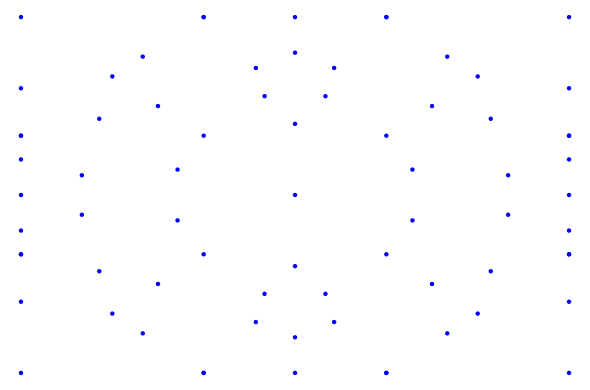

In [16]:
show(PlotS(-5,10),axes=False)

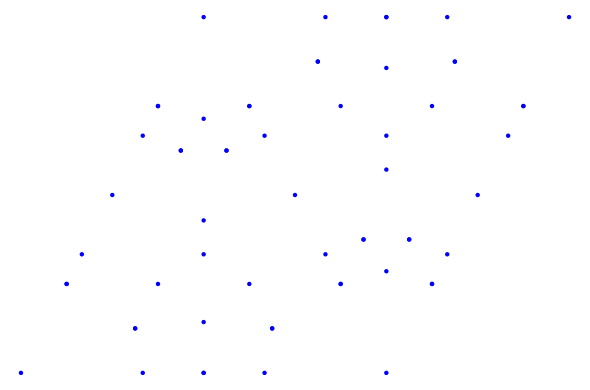

In [17]:
show(PlotS(-7,10),axes=False)

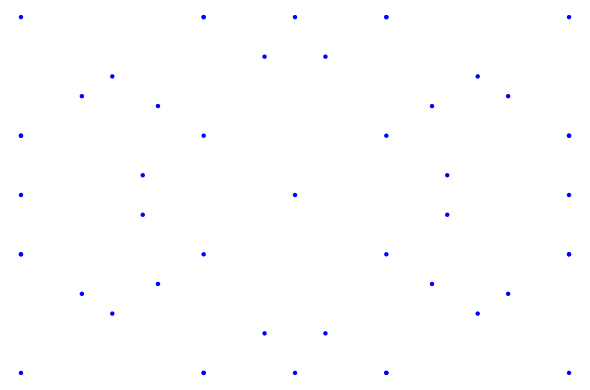

In [19]:
show(PlotS(-137,10),axes=False)